
# **Regresiones: Lineal, Polinómica y Logística**


## Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_breast_cancer



---
## 1) Regresión Lineal


In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Entrenamiento


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

### Evaluación


In [4]:
y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", round(mse, 4))
print("R^2:", round(r2, 4))
print("Coeficientes (en orden de columnas):\n", dict(zip(X.columns, linreg.coef_)))
print("Intercepto:", linreg.intercept_)

MSE: 0.5559
R^2: 0.5758
Coeficientes (en orden de columnas):
 {'MedInc': np.float64(0.44867490966571666), 'HouseAge': np.float64(0.009724257517904806), 'AveRooms': np.float64(-0.12332334282795815), 'AveBedrms': np.float64(0.7831449067929722), 'Population': np.float64(-2.029620580100075e-06), 'AveOccup': np.float64(-0.003526318487134238), 'Latitude': np.float64(-0.4197924865883604), 'Longitude': np.float64(-0.433708064963987)}
Intercepto: -37.02327770606409


### Gráfico y_real vs y_pred con línea ideal y ajuste lineal


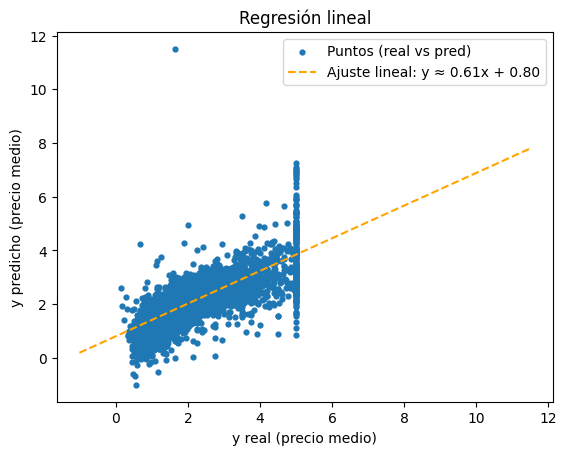

In [36]:
plt.figure()
plt.scatter(y_test, y_pred, s=12, label="Puntos (real vs pred)")
plt.xlabel("y real (precio medio)")
plt.ylabel("y predicho (precio medio)")
plt.title("Regresión lineal")


# Línea de mejor ajuste, lo del modelo
min_val = float(min(y_test.min(), y_pred.min()))
max_val = float(max(y_test.max(), y_pred.max()))
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot([min_val, max_val], [m*min_val + b, m*max_val + b], linestyle='--', color="orange", label=f"Ajuste lineal: y ≈ {m:.2f}x + {b:.2f}")

plt.legend()
plt.show()



---
## 2) Regresión Polinómica
**Datos sintéticos:** $y = \sin(x) + \epsilon$.  

### Datos sintéticos


In [5]:
rng = np.random.RandomState(42)
n = 120
X = np.linspace(-3*np.pi/2, 3*np.pi/2, n).reshape(-1, 1)
y = np.sin(X).ravel() + rng.normal(scale=0.15, size=n)
X[:10], y[:10]

(array([[-4.71238898],
        [-4.63318917],
        [-4.55398935],
        [-4.47478954],
        [-4.39558972],
        [-4.31638991],
        [-4.23719009],
        [-4.15799028],
        [-4.07879046],
        [-3.99959065]]),
 array([1.07450712, 0.97612569, 1.08463427, 1.20036027, 0.91511439,
        0.88749111, 1.12608367, 0.96533235, 0.73548108, 0.83791887]))

### Entrenamiento

In [27]:
# Grado 1 (lineal)
poly1 = PolynomialFeatures(degree=1, include_bias=True)
X1 = poly1.fit_transform(X)
lin1 = LinearRegression()
lin1.fit(X1, y)

# Grado 9
poly9 = PolynomialFeatures(degree=9, include_bias=True)
X9 = poly9.fit_transform(X)
lin9 = LinearRegression()
lin9.fit(X9, y)

LinearRegression()

### Evaluación


In [28]:
X_grid = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
Xg1 = poly1.transform(X_grid)
Xg9 = poly9.transform(X_grid)
y1 = lin1.predict(Xg1)
y9 = lin9.predict(Xg9)

### Gráfico


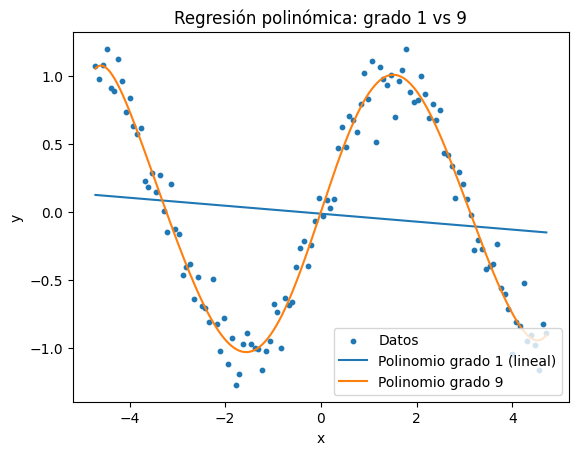

In [29]:
plt.figure()
plt.scatter(X, y, s=10, label="Datos")
plt.plot(X_grid, y1, label="Polinomio grado 1 (lineal)")
plt.plot(X_grid, y9, label="Polinomio grado 9")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión polinómica: grado 1 vs 9")
plt.legend()
plt.show()



---
## 3) Regresión Logística

### Datos


In [50]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
pd.concat([X, y], axis=1).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Entrenamiento

In [51]:
# Split (estratificado por clase)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarización
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

# Modelo
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

### Evaluación

In [52]:
y_pred = logreg.predict(X_test_std)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  1]
 [ 1 71]]


# Actividad
* Realice una regresión lineal para el dataset `diabetes`.
* Además de las métricas `mean_squared_error` (MSE) y `R2`, agregué la métrica `root_mean_squared_error` (RMSE). ¿En qué se diferencian MSE vs RMSE?
* ¿Qué interpreta de los resultados?.
* Para el dataset sintético de regresión polinomial, evalue y grafique que sucede cuando el `degree` es 2, 3, 4 y 5.
* Realice regresión logística (clasificación) en el dataset de flores `iris`
* Busque cómo funciona la regresión logística si hay más de dos clases para etiquetar (iris tiene 3 clases)
* Cuanto termine, me avisa para marcar un 1 (logrado).
* Pueden trabajar de a dos o tres.

In [31]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris

## Dataset Diabetes

In [37]:
data = load_diabetes(as_frame=True)
X = data.data
y = data.target
pd.concat([X, y], axis=1).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Dataset Iris

In [39]:
data = load_iris(as_frame=True)
X = data.data
y = data.target
pd.concat([X, y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
y.value_counts()

,count
target,
0,50
1,50
2,50
